In [244]:
# As per https://www.kaggle.com/code/alexteboul/heart-disease-health-indicators-dataset-notebook/notebook

In [291]:
#imports
import os
import pandas as pd
import random
random.seed(1)
import matplotlib.pyplot as plt
import numpy as np
import us

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [292]:
brfssDataset = pd.read_csv('../data/2021.csv')

In [293]:
brfssDataset.shape #304 columns with 438,693 rows

(438693, 304)

In [294]:
brfssDataset.tail()

,Unnamed: 0,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,...,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
438688,438688,78.0,12.0,b'01062022',b'01',b'06',b'2022',1100.0,b'2021001381',2.021001e+09,...,1.0,1.0,157.0,393.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
438689,438689,78.0,12.0,b'01122022',b'01',b'12',b'2022',1100.0,b'2021001382',2.021001e+09,...,1.0,1.0,200.0,157.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
438690,438690,78.0,12.0,b'12212021',b'12',b'21',b'2021',1100.0,b'2021001383',2.021001e+09,...,1.0,1.0,200.0,143.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
438691,438691,78.0,12.0,b'01112022',b'01',b'11',b'2022',1100.0,b'2021001384',2.021001e+09,...,1.0,1.0,100.0,156.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
438692,438692,78.0,12.0,b'12222021',b'12',b'22',b'2021',1100.0,b'2021001385',2.021001e+09,...,1.0,1.0,34.0,66.0,2.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79


In [295]:
# choose columns
requiredFields = ['_MICHD', # Ever had  coronary heart disease (CHD) or myocardial infarction (MI)
                  '_RFHYPE6', #High Blood Pressure,
                  'TOLDHI3', '_CHOLCH3', #Told cholesterol is high, cholesterol check within last 5 years
                  '_BMI5', #Body Mass Index
                  'SMOKE100', # Smoked at least 100 cigarettes (5 packs) in your life
                  'CVDSTRK3', 'DIABETE4', #Had a stroke, Ever had diabetes
                  '_TOTINDA', #Excersise in last 30 days (not during work)
                  'FRUTDA2_', 'GRENDA1_', 'POTADA1_', 'VEGEDA2_', #How many per day: fruit, Dark Green Veg, Potatoes, Other Veg
                  '_RFDRHV7', #Heavy Drinker,
                  'PRIMINSR', 'MEDCOST1', #Primary Source of Healthcare, could not afford healthcare
                  'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK', #General Health, mental & physical health days not good in past 30, difficulty walking
                  'SEXVAR', '_AGEG5YR', 'EDUCA', 'INCOME3', #Sex of respondent, age category, highest education, household income
                  '_STATE'
                ]
optionalFields = ['BPMEDS', #Blood Pressure Meds
                  'CHOLMED3', #Cholesterol meds
                  'DIABAGE3' #Diabetes Age
                  ]

brfssSelected = brfssDataset[requiredFields + optionalFields]

In [296]:
brfssSelected.shape #28 columns with 438,693 rows

(438693, 28)

In [297]:
# --- Cleaning Required Fields ---
brfssSelected = brfssSelected.dropna(subset=requiredFields)
brfssSelected.shape #Dropped all rows where our required fields were not selected

(302725, 28)

In [298]:
# _MICHD
#Change 2 to 0 as 2 means did not report having MI or CHD
brfssSelected['_MICHD'] = brfssSelected['_MICHD'].replace({2: 0})
print(brfssSelected['_MICHD'].unique())

[0. 1.]


In [299]:
#_RFHYPE6
#Change 1 to 0 = No high blood pressure and 2 to 1 = high blood pressure. Remove 9 which means unknown
brfssSelected['_RFHYPE6'] = brfssSelected['_RFHYPE6'].replace({1:0, 2:1})
brfssSelected = brfssSelected[brfssSelected['_RFHYPE6'] != 9]
print(brfssSelected['_RFHYPE6'].unique())
print(brfssSelected.shape) # Drops about 800 rows

[0. 1.]
(302049, 28)


In [300]:
#TOLDHI3
# Change 2 to 0 = No
# Remove all 7 & 9 (dont knows & refused)
brfssSelected['TOLDHI3'] = brfssSelected['TOLDHI3'].replace({2:0})
brfssSelected = brfssSelected[brfssSelected['TOLDHI3'] != 7]
brfssSelected = brfssSelected[brfssSelected['TOLDHI3'] != 9]
print(brfssSelected['TOLDHI3'].unique())
print(brfssSelected.shape) # Drops about 1800 rows

[1. 0.]
(300089, 28)


In [301]:
#_CHOLCH3
# Change 2 & 3 to 0 = Not checked cholesterol in past 5 years
# Remove 9
brfssSelected['_CHOLCH3'] = brfssSelected['_CHOLCH3'].replace({3:0,2:0})
brfssSelected = brfssSelected[brfssSelected['_CHOLCH3'] != 9]
print(brfssSelected['_CHOLCH3'].unique())
print(brfssSelected.shape) # Drops about 200 rows

[1. 0.]
(299856, 28)


In [302]:
#_BMI5
print(brfssSelected["_BMI5"].head()) #Need to divide by 100
brfssSelected['_BMI5'] = brfssSelected['_BMI5'].div(100)
print(brfssSelected['_BMI5'].unique())

0    1454.0
2    2829.0
3    3347.0
4    2873.0
5    2437.0
Name: _BMI5, dtype: float64
[14.54 28.29 33.47 ... 63.83 54.6  56.32]


In [303]:
#SMOKE100
# Change 2 to 0 = No
# Remove all 7 & 9
brfssSelected['SMOKE100'] = brfssSelected['SMOKE100'].replace({2:0})
brfssSelected = brfssSelected[brfssSelected['SMOKE100'] != 7]
brfssSelected = brfssSelected[brfssSelected['SMOKE100'] != 9]
print(brfssSelected['SMOKE100'].unique())
print(brfssSelected.shape) #drops about 1800 rows

[1. 0.]
(298397, 28)


In [304]:
#CVDSTRK3
# Change 2 to 0 = No
# Remove all 7 & 9
brfssSelected['CVDSTRK3'] = brfssSelected['CVDSTRK3'].replace({2:0})
brfssSelected = brfssSelected[brfssSelected['CVDSTRK3'] != 7]
brfssSelected = brfssSelected[brfssSelected['CVDSTRK3'] != 9]
print(brfssSelected['CVDSTRK3'].unique())
print(brfssSelected.shape) #drops about 600 rows

[0. 1.]
(297802, 28)


In [305]:
#DIABETE4
# Ordinal. 0 = no diabetes/pregnancy only, 1 = pre-diabetes/borderline, 2 = yes
# Remove all 7 & 9
brfssSelected['DIABETE4'] = brfssSelected['DIABETE4'].replace({2:0, 3:0, 1:2, 4:1})
brfssSelected = brfssSelected[brfssSelected['DIABETE4'] != 7]
brfssSelected = brfssSelected[brfssSelected['DIABETE4'] != 9]
print(brfssSelected['DIABETE4'].unique())
print(brfssSelected.shape) #drops about 300 rows


[0. 2. 1.]
(297550, 28)


In [306]:
#_TOTINDA
# Change 2 to 0 = No exercise last 30 days
# Remove all 9
brfssSelected['_TOTINDA'] = brfssSelected['_TOTINDA'].replace({2:0})
brfssSelected = brfssSelected[brfssSelected['_TOTINDA'] != 9]
print(brfssSelected['_TOTINDA'].unique())
print(brfssSelected.shape) #drops about 400 rows

[0. 1.]
(297207, 28)


In [307]:
#FRUTDA2_
brfssSelected['FRUTDA2_'].value_counts(sort = False, bins=10) #Max Fruit Per Day - Ignore anything over 13.5

(-9.901, 990.0]     295751
(990.0, 1980.0]        245
(1980.0, 2970.0]        70
(2970.0, 3960.0]       440
(3960.0, 4950.0]         3
(4950.0, 5940.0]        11
(5940.0, 6930.0]        16
(6930.0, 7920.0]         1
(7920.0, 8910.0]         3
(8910.0, 9900.0]       667
Name: FRUTDA2_, dtype: int64

In [308]:
def remove_outliers(col, plot=False, upper=0.75):
    if plot:
        plt.boxplot(col)
        plt.show()

    sorted(col)
    Q1, Q3 = col.quantile([0.25, upper])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 *IQR)
    upper_range = Q3 + (1.5 *IQR)

    col = np.where(col > upper_range, upper_range, col)
    col = np.where(col < lower_range, lower_range, col)

    if plot:
        plt.boxplot(col)
        plt.show()

    return col

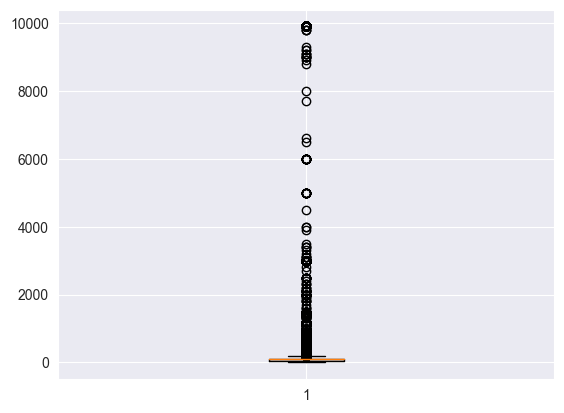

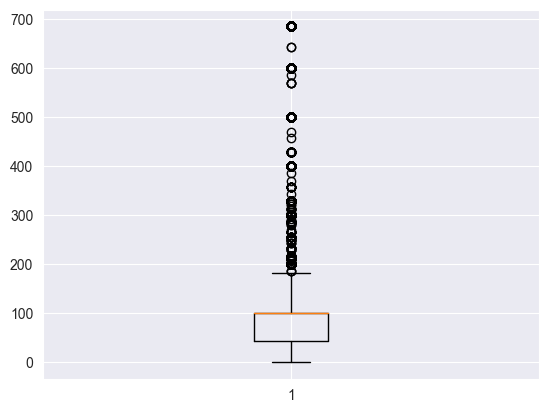

(297207, 28)


In [309]:
#FRUTDA2_
brfssSelected['FRUTDA2_'] = remove_outliers(brfssSelected['FRUTDA2_'], True, 0.95)
brfssSelected['FRUTDA2_'] = brfssSelected['FRUTDA2_'].div(100)
print(brfssSelected.shape)

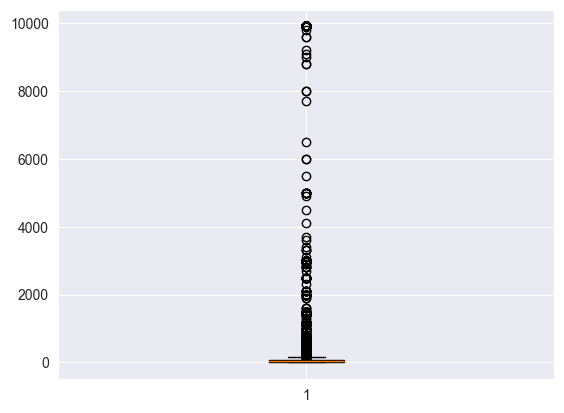

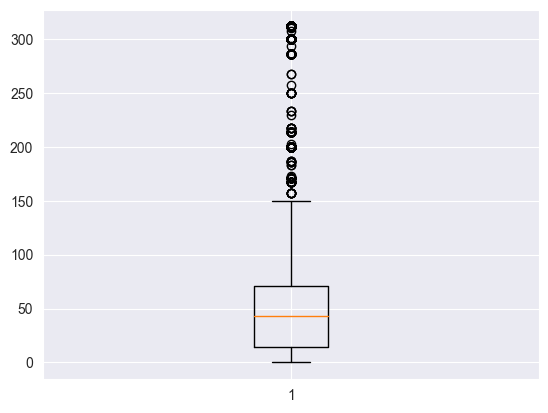

(297207, 28)


In [310]:
#GRENDA1_
brfssSelected['GRENDA1_'] = remove_outliers(brfssSelected['GRENDA1_'], True, 0.95)
brfssSelected['GRENDA1_'] = brfssSelected['GRENDA1_'].div(100)
print(brfssSelected.shape)

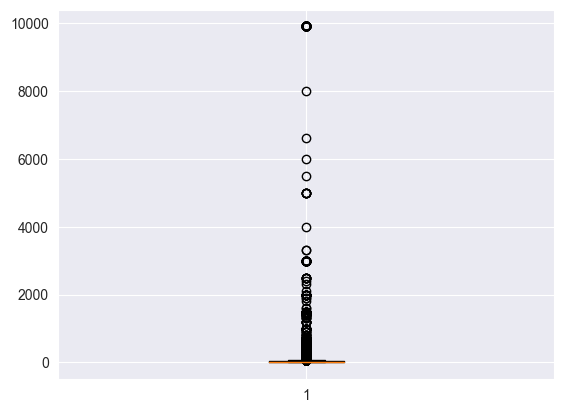

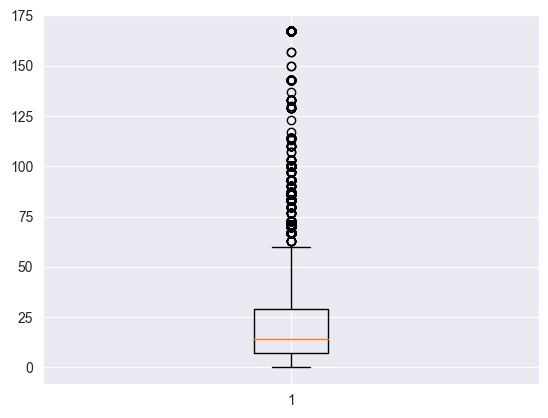

(297207, 28)


In [311]:
# POTADA1_
brfssSelected['POTADA1_'] = remove_outliers(brfssSelected['POTADA1_'], True, 0.95)
brfssSelected['POTADA1_'] = brfssSelected['POTADA1_'].div(100)
print(brfssSelected.shape)

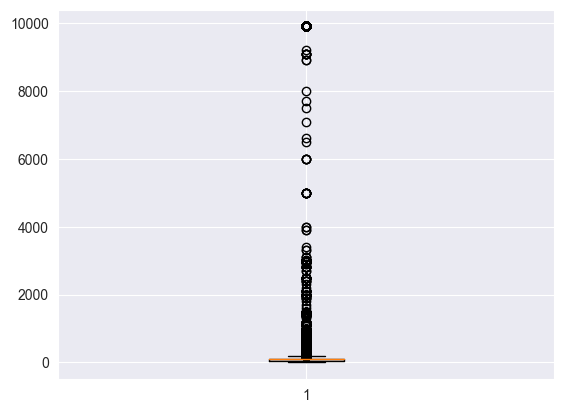

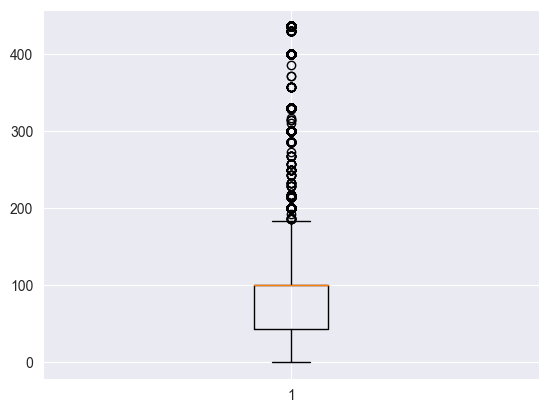

(297207, 28)


In [312]:
# VEGEDA2_
brfssSelected['VEGEDA2_'] = remove_outliers(brfssSelected['VEGEDA2_'], True, 0.95)
brfssSelected['VEGEDA2_'] = brfssSelected['VEGEDA2_'].div(100)
print(brfssSelected.shape) #drops 0 rows

In [313]:
# _RFDRHV7
brfssSelected['_RFDRHV7'] = brfssSelected['_RFDRHV7'].replace({2:1, 1:0})
brfssSelected = brfssSelected[brfssSelected['_RFDRHV7'] != 9]
print(brfssSelected.shape) # drops 3900

(293306, 28)


In [314]:
# PRIMINSR
# 1-10 = 1 yes does have health insurance
# 88 = 0 no coverage
# drop 77 & 99
brfssSelected = brfssSelected[brfssSelected['PRIMINSR'] != 99]
brfssSelected = brfssSelected[brfssSelected['PRIMINSR'] != 77]
brfssSelected['PRIMINSR'] = brfssSelected['PRIMINSR'].replace({88:0, 2:1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1})
print(brfssSelected['PRIMINSR'].unique())
print(brfssSelected.shape) # drops 7000

[1. 0.]
(286506, 28)


In [315]:
# MEDCOST1
# Change 2 to 0 = no
# Remove 7 & 9
brfssSelected['MEDCOST1'] = brfssSelected['MEDCOST1'].replace({2:0})
brfssSelected = brfssSelected[brfssSelected['MEDCOST1'] != 7]
brfssSelected = brfssSelected[brfssSelected['MEDCOST1'] != 9]
print(brfssSelected['MEDCOST1'].unique())
print(brfssSelected.shape) # drops 500

[0. 1.]
(286066, 28)


In [316]:
# GENHLTH
# 1 = excellant
# 5 = poor
brfssSelected = brfssSelected[brfssSelected['GENHLTH'] != 7]
brfssSelected = brfssSelected[brfssSelected['GENHLTH'] != 9]
print(brfssSelected['GENHLTH'].unique())
print(brfssSelected.shape) # drops 350

[5. 2. 3. 4. 1.]
(285696, 28)


In [317]:
# MENTHLTH (days in last 30 days)
# 88 --> 0 (none)
# Drop 77 & 99
brfssSelected = brfssSelected[brfssSelected['MENTHLTH'] != 77]
brfssSelected = brfssSelected[brfssSelected['MENTHLTH'] != 99]
brfssSelected['MENTHLTH'] = brfssSelected['MENTHLTH'].replace({88:0})
print(brfssSelected['MENTHLTH'].unique())
print(brfssSelected.shape) # drops 3000

[10.  0.  5. 25.  2.  7. 30.  3. 14. 20.  8.  1. 15.  4. 28. 24. 21. 12.
  6. 22. 27. 18. 13. 17. 16.  9. 19. 29. 23. 11. 26.]
(282651, 28)


In [318]:
# PHYSHLTH (days in last 30 days)
# 88 --> 0 (none)
# Drop 77 & 99
brfssSelected = brfssSelected[brfssSelected['PHYSHLTH'] != 77]
brfssSelected = brfssSelected[brfssSelected['PHYSHLTH'] != 99]
brfssSelected['PHYSHLTH'] = brfssSelected['PHYSHLTH'].replace({88:0})
print(brfssSelected['PHYSHLTH'].unique())
print(brfssSelected.shape) # drops 3000

[20.  0. 30. 25.  1.  4. 10.  2.  3. 15.  8. 13. 14.  5.  7.  6. 24. 29.
 18.  9. 16. 17. 26. 12. 28. 21. 27. 11. 19. 22. 23.]
(279182, 28)


In [319]:
# DIFFWALK
brfssSelected['DIFFWALK'] = brfssSelected['DIFFWALK'].replace({2:0})
brfssSelected = brfssSelected[brfssSelected['DIFFWALK'] != 7]
brfssSelected = brfssSelected[brfssSelected['DIFFWALK'] != 9]
print(brfssSelected['DIFFWALK'].unique())
print(brfssSelected.shape) # drops 600

[0. 1.]
(278598, 28)


In [320]:
# SEXVAR
# change 2 to 0 (female as 0). Male is 1
brfssSelected['SEXVAR'] = brfssSelected['SEXVAR'].replace({2:0})
print(brfssSelected['SEXVAR'].unique())

[0. 1.]


In [321]:
# _AGEG5YR
# Ordinal. 1 = 18-24, 13 = 80+ (5 year increments)
# Remove 14
brfssSelected = brfssSelected[brfssSelected['_AGEG5YR'] != 14]
print(brfssSelected['_AGEG5YR'].unique())
print(brfssSelected.shape) # drops 2000

[11.  9. 12. 13. 10.  7.  6.  8.  4.  3.  5.  2.  1.]
(276028, 28)


In [322]:
# EDUCA
# Ordinal. 1 = never attended school. 6 = college for 4 years or more
# Remove 9
brfssSelected = brfssSelected[brfssSelected['EDUCA'] != 9]
print(brfssSelected['EDUCA'].unique())
print(brfssSelected.shape) # drops 300

[4. 3. 5. 6. 2. 1.]
(275717, 28)


In [323]:
# INCOME3
# Oridinal. 1 = less than 10,000, 11 = 200k+
brfssSelected = brfssSelected[brfssSelected['INCOME3'] != 77]
brfssSelected = brfssSelected[brfssSelected['INCOME3'] != 99]
print(brfssSelected['INCOME3'].unique())
print(brfssSelected.shape) # drops 38,000

[ 5.  3.  7.  4.  6.  8.  2.  9. 10.  1. 11.]
(238832, 28)


In [324]:
# _STATE
brfssSelected['_STATE'] = brfssSelected['_STATE'].astype(int).apply("{0:0=2d}".format)
brfssSelected['_STATE'] = brfssSelected['_STATE'].apply(lambda x: us.states.lookup(x).abbr)
print(brfssSelected['_STATE'].unique())

['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'GA' 'HI' 'ID' 'IL' 'IN'
 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE' 'NV'
 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN'
 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY' 'GU' 'PR' 'VI']


In [325]:
# --- Cleaning Optional Fields ---
#BPMEDS
#Remove 7 & 9
#Set null to 0
brfssSelected = brfssSelected[brfssSelected['BPMEDS'] != 7]
brfssSelected = brfssSelected[brfssSelected['BPMEDS'] != 9]
brfssSelected = brfssSelected.fillna({'BPMEDS':0})
brfssSelected['BPMEDS'] = brfssSelected['BPMEDS'].replace({2:0})
print(brfssSelected['BPMEDS'].unique())
print(brfssSelected.shape) # drops 100

[0. 1.]
(238738, 28)


In [326]:
# CHOLMED3
brfssSelected = brfssSelected[brfssSelected['CHOLMED3'] != 7]
brfssSelected = brfssSelected[brfssSelected['CHOLMED3'] != 9]
brfssSelected = brfssSelected.fillna({'CHOLMED3':0})
brfssSelected['CHOLMED3'] = brfssSelected['CHOLMED3'].replace({2:0})
print(brfssSelected['CHOLMED3'].unique())
print(brfssSelected.shape) # drops 500

[1. 0.]
(238216, 28)


In [327]:
# DIABAGE3
# Age you got diabetes - 1-97
# Remove 98 & 99
# Set never to 0 or 100??
brfssSelected = brfssSelected[brfssSelected['DIABAGE3'] != 98]
brfssSelected = brfssSelected[brfssSelected['DIABAGE3'] != 99]
brfssSelected = brfssSelected.fillna({'DIABAGE3':0}) #Not sure whether to set to 0 or 100?
print(brfssSelected['DIABAGE3'].unique())
# drops 1400

[ 0. 56. 65. 62. 10. 60. 77. 34. 72. 58. 64. 40. 49. 50. 52. 28. 46. 55.
 63. 19. 76. 24. 51. 68. 70. 59. 32. 35. 13. 37. 48. 41. 30. 74. 69. 45.
 17. 61. 80. 54. 53. 57. 67. 66. 79. 38. 33. 23. 42. 12. 22. 44. 26. 43.
 39. 25. 75. 20. 36. 47. 31. 71. 18. 29.  9. 78. 11. 27.  7. 85. 21. 14.
 81.  5. 86.  1. 15. 82. 83. 73.  8. 16. 87. 90. 84.  4. 92.  3.  6. 88.
 94. 95.  2. 93. 89. 97.]


In [328]:
print(brfssSelected.shape) # Total = 236,808
print(brfssSelected.head(2))

(236808, 28)
   _MICHD  _RFHYPE6  TOLDHI3  _CHOLCH3  _BMI5  SMOKE100  CVDSTRK3  DIABETE4  \
0     0.0       0.0      1.0       1.0  14.54       1.0       0.0       0.0   
3     0.0       1.0      1.0       1.0  33.47       0.0       0.0       2.0   

   _TOTINDA  FRUTDA2_  ...  PHYSHLTH  DIFFWALK  SEXVAR  _AGEG5YR  EDUCA  \
0       0.0      1.00  ...      20.0       0.0     0.0      11.0    4.0   
3       1.0      0.43  ...       0.0       0.0     0.0       9.0    4.0   

   INCOME3  _STATE  BPMEDS  CHOLMED3  DIABAGE3  
0      5.0      AL     0.0       1.0       0.0  
3      7.0      AL     1.0       0.0      56.0  

[2 rows x 28 columns]


In [329]:
#Check Group Sizes of the heart disease column
brfssSelected.groupby(['_MICHD']).size()

_MICHD
0.0    216557
1.0     20251
dtype: int64

In [330]:
# Make Columns more readable
#Rename the columns to make them more readable
brfss = brfssSelected.rename(columns = {'_MICHD':'HeartDiseaseOrAttack',
                                         '_RFHYPE6':'HighBP',
                                         'TOLDHI3':'HighChol', '_CHOLCH3':'CholCheckLast5Years',
                                         '_BMI5':'BMI',
                                         'SMOKE100':'Smoker',
                                         'CVDSTRK3':'Stroke', 'DIABETE4':'Diabetes',
                                         '_TOTINDA':'PhysActivityLast30Days',
                                         'FRUTDA2_':'FruitsPerDay', 'GRENDA1_':'DarkGreensPerDay', 'POTADA1_':'PotatoesPerDay', 'VEGEDA2_': 'OtherVegPerDay',
                                         '_RFDRHV7':'HeavyDrinker',
                                         'PRIMINSR':'AnyHealthcare', 'MEDCOST1':'CantAffordHealthcare',
                                         'GENHLTH':'GeneralHealth', 'MENTHLTH':'BadMentalHealthLast30Days', 'PHYSHLTH':'BadPhysicalHealthLast30Days', 'DIFFWALK':'DiffWalking',
                                         'SEXVAR':'Sex', '_AGEG5YR':'AgeGroup', 'EDUCA':'HighestEducation', 'INCOME3':'IncomeGroup',
                                         'BPMEDS': 'HighBPMeds', 'CHOLMED3':'CholMeds', 'DIABAGE3':'DiabetesAge', '_STATE':'State'})

In [331]:
brfss.head()

,HeartDiseaseOrAttack,HighBP,HighChol,CholCheckLast5Years,BMI,Smoker,Stroke,Diabetes,PhysActivityLast30Days,FruitsPerDay,...,BadPhysicalHealthLast30Days,DiffWalking,Sex,AgeGroup,HighestEducation,IncomeGroup,State,HighBPMeds,CholMeds,DiabetesAge
0,0.0,0.0,1.0,1.0,14.54,1.0,0.0,0.0,0.0,1.00,...,20.0,0.0,0.0,11.0,4.0,5.0,AL,0.0,1.0,0.0
3,0.0,1.0,1.0,1.0,33.47,0.0,0.0,2.0,1.0,0.43,...,0.0,0.0,0.0,9.0,4.0,7.0,AL,1.0,0.0,56.0
4,1.0,0.0,1.0,1.0,28.73,0.0,1.0,2.0,1.0,1.00,...,30.0,1.0,1.0,12.0,3.0,4.0,AL,0.0,1.0,65.0
5,0.0,0.0,0.0,1.0,24.37,1.0,0.0,0.0,0.0,0.29,...,0.0,1.0,1.0,13.0,5.0,6.0,AL,0.0,0.0,0.0
9,0.0,1.0,0.0,1.0,39.94,1.0,0.0,0.0,1.0,1.00,...,25.0,1.0,0.0,10.0,4.0,8.0,AL,1.0,1.0,0.0


In [332]:
brfss.groupby(['HeartDiseaseOrAttack']).size()

HeartDiseaseOrAttack
0.0    216557
1.0     20251
dtype: int64

In [333]:
brfss.to_csv('../data/heart_disease_health_indicators_BRFSS2021.csv', sep=",", index=False)